### Import libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import trim_mean
import wquantiles
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

#### Load data

In [2]:
AIRLINE_STATS_CSV   = 'data/airline_stats.csv'
KC_TAX_CSV          = 'data/kc_tax.csv.gz'
LC_LOANS_CSV        = 'data/lc_loans.csv'
AIRPORT_DELAYS_CSV  = 'data/dfw_airline.csv'
SP500_DATA_CSV      = 'data/sp500_data.csv.gz'
SP500_SECTORS_CSV   = 'data/sp500_sectors.csv'
STATE_CSV           = 'data/state.csv'

##### Estimates of Location

Example: Location estimates of Population and Murder Rates

In [3]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


`Mean`, `Median` and `Trimmed Mean`

In [13]:
# Mean Calculation using pandas function
mean = state['Population'].mean()
print(f'Mean of Population = {mean}')

# Median Calculation using pandas function
median = state['Population'].median()
print(f'Median of Population = {median}')

# Trimmed Mean Calculation using scipy.stats
trimmed_mean = trim_mean(state['Population'], 0.1)
print(f'Trimmed Mean of Population = {trimmed_mean}')

Mean of Population = 6162876.3
Median of Population = 4436369.5
Trimmed Mean of Population = 4783697.125


<p>Proof that how outlier is reduced from mean to median</p> <br>
Mean > Trimmed Mean > Median


`Weighted mean` and `Weighted Median`

In [16]:
# Weighted mean calculation using Numpy
weighted_mean = np.average(
    state['Murder.Rate'],
    weights = state['Population']
)
print(f'Weighted Mean of Murder rate where weights are Population = {weighted_mean}')

# Weighted Median calculation using wquantiles library
weighted_median = wquantiles.median(
    state['Murder.Rate'],
    weights = state['Population']
)
print(f'Weighted Median of Murder rate where weights are Population = {weighted_median}')


Weighted Mean of Murder rate where weights are Population = 4.445833981123393
Weighted Median of Murder rate where weights are Population = 4.4


### Estimates of Variability

In [6]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


`Standard Deviation`, `Interquartile range` and `Median absolute Deviation`

In [25]:
print(f"Standard Deviation of Population: {state['Population'].std()}")
print(f"Interquartile range { state['Population'].quantile(0.75) -  state['Population'].quantile(0.25) }")
# Method 1:
print(f"Mean Absolute Deviation {robust.scale.mad(state['Population'])}")
# Method 2:

'''
The value 0.6744897501960817 is the constant scaling factor for the median absolute deviation (MAD) to estimate the 
standard deviation of a normal distribution. This value is approximately equal to the inverse of the cumulative 
distribution function (CDF) at 0.75 for a standard normal distribution, which is commonly used in statistics.

In simpler terms, this constant is used to scale the median absolute deviation so that it can be interpreted in a way 
similar to the standard deviation of a normal distribution. It helps in comparing the variability of different datasets, 
especially when dealing with distributions that are not necessarily normally distributed.
'''

pd_mad = abs(
    state['Population'] - state['Population'].median()
).median() / 0.6744897501960817

print(f"Mean Absolute Deviation by Pandas: {pd_mad}")

Standard Deviation of Population: 6848235.347401142
Interquartile range 4847308.0
Mean Absolute Deviation 3849876.1459979336
Mean Absolute Deviation by Pandas: 3849876.1459979336


### Estimation of Distribution

In [5]:
# Quantiles
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


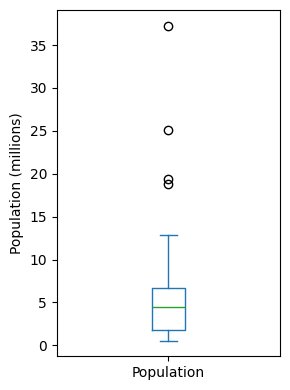

In [9]:
# Boxplot
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

#### Frequency Table and Histograms

In [14]:
# The cut method for pandas data splits the dataset into bins. There are a number of arguments for the method. 
# The following code creates equal sized bins. The method value_counts returns a frequency table.

binnedPopulation = pd.cut(state['Population'], 10)
display(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

In [13]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
display(pd.DataFrame(groups))

C:\Users\gg\AppData\Local\Temp\ipykernel_24068\736988800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


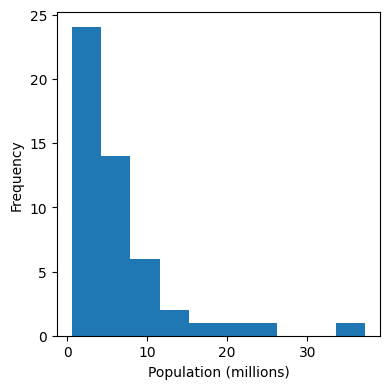

In [15]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

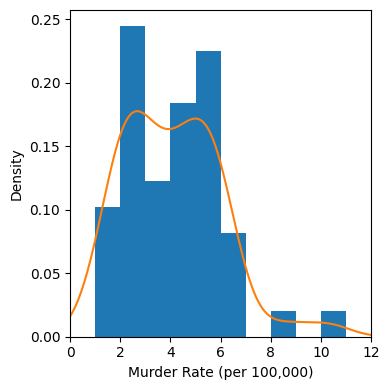

In [16]:
# Density Estimates
# Density is an alternative to histograms that can provide more insight into the distribution of the data points. 
# Use the argument bw_method to control the smoothness of the density curve.

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

### Exploring Binary and Categorical Data

In [11]:
dfw = pd.read_csv('data/dfw_airline.csv')
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


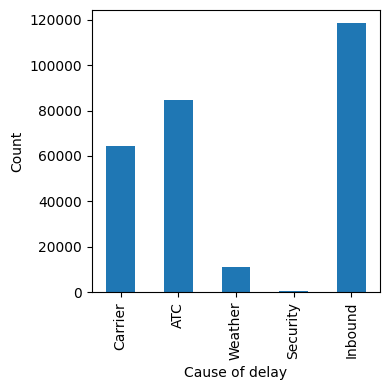

In [12]:
# Pandas also supports bar charts for displaying a single categorical variable.
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Correlation

In [3]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)

In [4]:
# Determine telecommunications symbols
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
display(telecom)

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


Next we focus on funds traded on major exchanges (sector == 'etf').

In [5]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
display(etfs.head())

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


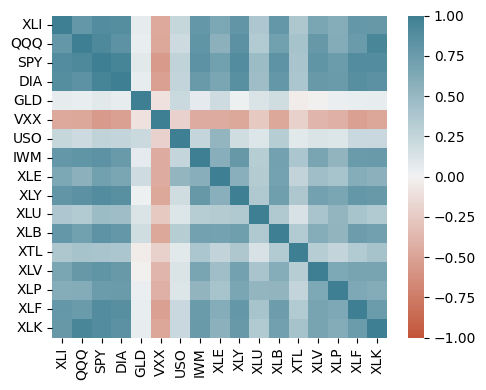

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(
        etfs.corr(), 
        vmin = -1, 
        vmax = 1,          
        cmap = sns.diverging_palette(
            20, 
            220, 
            as_cmap=True
        ),
        ax = ax
    )
plt.tight_layout()
plt.show()

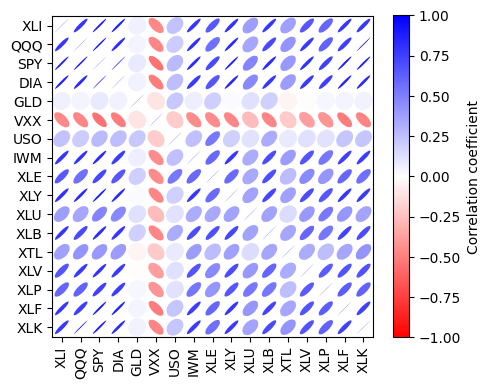

In [7]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Scatter Plot

Simple scatterplots are supported by pandas. Specifying the marker as $\u25EF$ uses an open circle for each point.

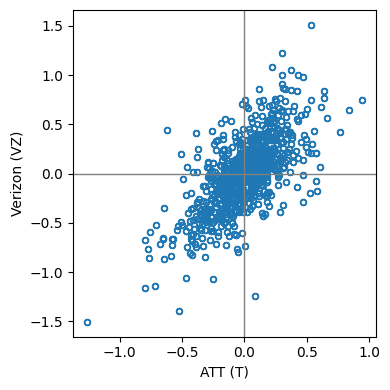

In [6]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

### Exploring Two or More Variables

Load the kc_tax dataset and filter based on a variety of criteria

In [3]:
kc_tax = pd.read_csv(KC_TAX_CSV)
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)

(432693, 3)


#### Hexagonal binning and Contours
Plotting numeric versus numeric data

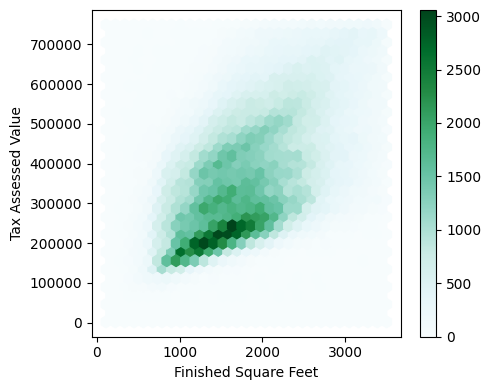

In [4]:
# If the number of data points gets large, scatter plots will no longer be meaningful. 
# Here methods that visualize densities are more useful. The hexbin method for pandas data frames is one powerful approach.
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

#### Contours chart
The seaborn kdeplot is a two-dimensional extension of the density plot. <br>
The calculation of the 2D-density for the full dataset takes several minutes.<br>
It is sufficient to create the visualization with a smaller sample of the dataset. <br>
With 10,000 data points, creating the graph takes only seconds. <br>
While some details may be lost, the overall shape is preserved.

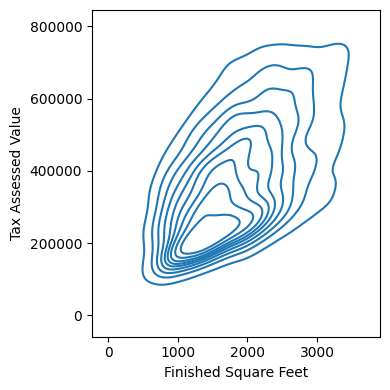

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

### Two Categorical Variables
PIVOT

In [3]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
# Table 1-8(1)
crosstab =  lc_loans.pivot_table(
                index='grade', # In excel its row
                columns='status', # In excel same as columns
                aggfunc=lambda x: len(x), # here it is count function
                margins=True
            )
display(crosstab)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
# Calculate percentage
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [5]:
display(perc_crosstab)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## Categorical and Numeric Data

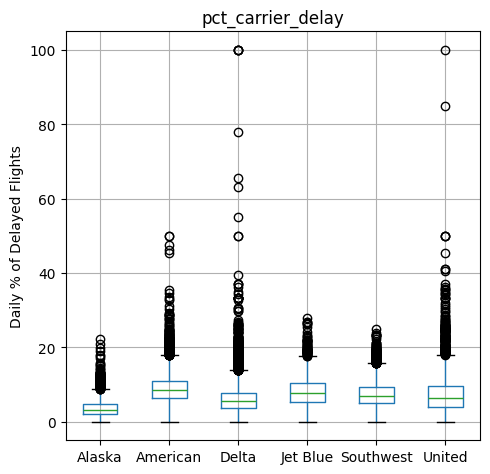

In [3]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()